In [1]:
# Import dependencies
import pandas as pd

In [52]:
# Pandas library setting
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

In [8]:
# Read us_county_sociohealth_data.csv
sochealth_df = pd.read_csv('us_county_sociohealth_data.csv')
sochealth_df.head(10)

,fips,state,county,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,teen_birth_rate,num_uninsured,percent_uninsured,num_primary_care_physicians,primary_care_physicians_rate,num_dentists,dentist_rate,num_mental_health_providers,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,percent_vaccinated,high_school_graduation_rate,num_some_college,population,percent_some_college,num_unemployed_CHR,labor_force,percent_unemployed_CHR,percent_children_in_poverty,eightieth_percentile_income,twentieth_percentile_income,income_ratio,num_single_parent_households_CHR,num_households_CHR,percent_single_parent_households_CHR,num_associations,social_association_rate,annual_average_violent_crimes,violent_crime_rate,num_injury_deaths,injury_death_rate,average_daily_pm2_5,presence_of_water_violation,percent_severe_housing_problems,severe_housing_cost_burden,overcrowding,inadequate_facilities,percent_drive_alone_to_work,num_workers_who_drive_alone,percent_long_commute_drives_alone,life_expectancy,num_deaths_2,age_adjusted_death_rate,num_deaths_3,child_mortality_rate,num_deaths_4,infant_mortality_rate,percent_frequent_physical_distress,percent_frequent_mental_distress,percent_adults_with_diabetes,num_hiv_cases,hiv_prevalence_rate,num_food_insecure,percent_food_insecure,num_limited_access,percent_limited_access_to_healthy_foods,num_drug_overdose_deaths,drug_overdose_mortality_rate,num_motor_vehicle_deaths,motor_vehicle_mortality_rate,percent_insufficient_sleep,num_uninsured_2,percent_uninsured_2,num_uninsured_3,percent_uninsured_3,other_primary_care_provider_rate,percent_disconnected_youth,average_grade_performance,average_grade_performance_2,median_household_income,percent_enrolled_in_free_or_reduced_lunch,segregation_index,segregation_index_2,homicide_rate,num_deaths_5,suicide_rate_age_adjusted,num_firearm_fatalities,firearm_fatalities_rate,juvenile_arrest_rate,average_traffic_volume_per_meter_of_major_roadways,num_homeowners,percent_homeowners,num_households_with_severe_cost_burden,percent_severe_housing_cost_burden,population_2,percent_less_than_18_years_of_age,percent_65_and_over,num_black,percent_black,num_american_indian_alaska_native,percent_american_indian_alaska_native,num_asian,percent_asian,num_native_hawaiian_other_pacific_islander,percent_native_hawaiian_other_pacific_islander,num_hispanic,percent_hispanic,num_non_hispanic_white,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,percent_female,num_rural,percent_rural,num_housing_units,num_households_CDC,num_below_poverty,num_unemployed_CDC,per_capita_income,num_no_highschool_diploma,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_single_parent_households_CDC,num_minorities,num_limited_english_abilities,num_multi_unit_housing,num_mobile_homes,num_overcrowding,num_households_with_no_vehicle,num_institutionalized_in_group_quarters,percent_below_poverty,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,percent_minorities,percent_limited_english_abilities,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_

In [9]:
# Find the categorical columns in sochealth_df
sochealth_cat = sochealth_df.dtypes[sochealth_df.dtypes == 'object'].index.tolist()
sochealth_cat

['fips', 'state', 'county', 'presence_of_water_violation']

In [13]:
# Find length of sochealth_df
len(sochealth_df)

3144

In [ ]:
# # Columns to drop in sochealth_df
# sochealth_remove_col = ['num_deaths', 'years_of_potential_life_lost_rate', 'num_driving_deaths', 'percent_driving_deaths_with_alcohol_involvement', \
#                        'num_chlamydia_cases', 'teen_birth_rate', 'num_uninsured', 'num_primary_care_physicians', 'num_dentists', 'num_mental_health_providers',\
#                        ]

In [50]:
# Find the missing data in sochealth_df
sochealth_missing = sochealth_df.count().where(sochealth_df.count()<3144).dropna()#/len(sochealth_df)*100
sochealth_missing

num_deaths                                         2851.0
years_of_potential_life_lost_rate                  2851.0
percent_low_birthweight                            3037.0
food_environment_index                             3125.0
percent_with_access_to_exercise_opportunities      3138.0
num_alcohol_impaired_driving_deaths                3109.0
num_driving_deaths                                 3109.0
percent_driving_deaths_with_alcohol_involvement    3109.0
num_chlamydia_cases                                2992.0
chlamydia_rate                                     2992.0
teen_birth_rate                                    2989.0
num_uninsured                                      3143.0
percent_uninsured                                  3143.0
num_primary_care_physicians                        2995.0
primary_care_physicians_rate                       2997.0
num_dentists                                       3056.0
dentist_rate                                       3056.0
num_mental_hea

In [49]:
len(sochealth_df.dropna(how='any'))

427

In [ ]:
# Fill the missing columns with mean/most common value in the state

In [75]:
# Read US_counties_COVID19_health_weather_data.csv
healthweather_df = pd.read_csv('US_counties_COVID19_health_weather_data.csv')
healthweather_df.head(10)

C:\Users\spo.DT\Anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (190,202) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,teen_birth_rate,num_uninsured,percent_uninsured,num_primary_care_physicians,primary_care_physicians_rate,num_dentists,dentist_rate,num_mental_health_providers,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,percent_vaccinated,high_school_graduation_rate,num_some_college,population,percent_some_college,num_unemployed_CHR,labor_force,percent_unemployed_CHR,percent_children_in_poverty,eightieth_percentile_income,twentieth_percentile_income,income_ratio,num_single_parent_households_CHR,num_households_CHR,percent_single_parent_households_CHR,num_associations,social_association_rate,annual_average_violent_crimes,violent_crime_rate,num_injury_deaths,injury_death_rate,average_daily_pm2_5,presence_of_water_violation,percent_severe_housing_problems,severe_housing_cost_burden,overcrowding,inadequate_facilities,percent_drive_alone_to_work,num_workers_who_drive_alone,percent_long_commute_drives_alone,life_expectancy,num_deaths_2,age_adjusted_death_rate,num_deaths_3,child_mortality_rate,num_deaths_4,infant_mortality_rate,percent_frequent_physical_distress,percent_frequent_mental_distress,percent_adults_with_diabetes,num_hiv_cases,hiv_prevalence_rate,num_food_insecure,percent_food_insecure,num_limited_access,percent_limited_access_to_healthy_foods,num_drug_overdose_deaths,drug_overdose_mortality_rate,num_motor_vehicle_deaths,motor_vehicle_mortality_rate,percent_insufficient_sleep,num_uninsured_2,percent_uninsured_2,num_uninsured_3,percent_uninsured_3,other_primary_care_provider_rate,percent_disconnected_youth,average_grade_performance,average_grade_performance_2,...,percent_hispanic,num_non_hispanic_white,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,percent_female,num_rural,percent_rural,num_housing_units,num_households_CDC,num_below_poverty,num_unemployed_CDC,per_capita_income,num_no_highschool_diploma,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_single_parent_households_CDC,num_minorities,num_limited_english_abilities,num_multi_unit_housing,num_mobile_homes,num_overcrowding,num_households_with_no_vehicle,num_institutionalized_in_group_quarters,percent_below_poverty,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,percent_minorities,percent_limited_english_abilities,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability,km_to_closest_station,CALL,ELEV_M,station_id,station_name,mean_temp,min_temp,max_temp,dewpoint,sea_level_pre

In [235]:
columns_all = healthweather_df.columns

In [237]:
for column in columns_all:
    print(column)

date
county
state
fips
cases
deaths
stay_at_home_announced
stay_at_home_effective
lat
lon
total_population
area_sqmi
population_density_per_sqmi
num_deaths
years_of_potential_life_lost_rate
percent_fair_or_poor_health
average_number_of_physically_unhealthy_days
average_number_of_mentally_unhealthy_days
percent_low_birthweight
percent_smokers
percent_adults_with_obesity
food_environment_index
percent_physically_inactive
percent_with_access_to_exercise_opportunities
percent_excessive_drinking
num_alcohol_impaired_driving_deaths
num_driving_deaths
percent_driving_deaths_with_alcohol_involvement
num_chlamydia_cases
chlamydia_rate
teen_birth_rate
num_uninsured
percent_uninsured
num_primary_care_physicians
primary_care_physicians_rate
num_dentists
dentist_rate
num_mental_health_providers
mental_health_provider_rate
preventable_hospitalization_rate
percent_with_annual_mammogram
percent_vaccinated
high_school_graduation_rate
num_some_college
population
percent_some_college
num_unemployed_CHR
l

In [100]:
healthweather_df['fips'].nunique()

2942

In [76]:
# Find the most recent date of info
healthweather_df['date'].max()

'2020-05-26'

In [101]:
# Make sure all the counties have info for that last date
max_date = healthweather_df[['fips','date']].groupby('fips').max().reset_index()['date'].unique()[0]
max_date

'2020-05-26'

In [102]:
# Filter the original dataframe to the max_date
healthweather_last_df = healthweather_df[healthweather_df['date'] == max_date]

In [103]:
len(healthweather_last_df)

2942

In [104]:
# Define the death_rate column
healthweather_last_df['death_rate'] = healthweather_last_df['deaths']/healthweather_last_df['cases']

C:\Users\spo.DT\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
# Make sure there is no null value in the death_rate column
healthweather_last_df[healthweather_last_df['death_rate'].isnull()]

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,teen_birth_rate,num_uninsured,percent_uninsured,num_primary_care_physicians,primary_care_physicians_rate,num_dentists,dentist_rate,num_mental_health_providers,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,percent_vaccinated,high_school_graduation_rate,num_some_college,population,percent_some_college,num_unemployed_CHR,labor_force,percent_unemployed_CHR,percent_children_in_poverty,eightieth_percentile_income,twentieth_percentile_income,income_ratio,num_single_parent_households_CHR,num_households_CHR,percent_single_parent_households_CHR,num_associations,social_association_rate,annual_average_violent_crimes,violent_crime_rate,num_injury_deaths,injury_death_rate,average_daily_pm2_5,presence_of_water_violation,percent_severe_housing_problems,severe_housing_cost_burden,overcrowding,inadequate_facilities,percent_drive_alone_to_work,num_workers_who_drive_alone,percent_long_commute_drives_alone,life_expectancy,num_deaths_2,age_adjusted_death_rate,num_deaths_3,child_mortality_rate,num_deaths_4,infant_mortality_rate,percent_frequent_physical_distress,percent_frequent_mental_distress,percent_adults_with_diabetes,num_hiv_cases,hiv_prevalence_rate,num_food_insecure,percent_food_insecure,num_limited_access,percent_limited_access_to_healthy_foods,num_drug_overdose_deaths,drug_overdose_mortality_rate,num_motor_vehicle_deaths,motor_vehicle_mortality_rate,percent_insufficient_sleep,num_uninsured_2,percent_uninsured_2,num_uninsured_3,percent_uninsured_3,other_primary_care_provider_rate,percent_disconnected_youth,average_grade_performance,average_grade_performance_2,...,num_non_hispanic_white,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,percent_female,num_rural,percent_rural,num_housing_units,num_households_CDC,num_below_poverty,num_unemployed_CDC,per_capita_income,num_no_highschool_diploma,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_single_parent_households_CDC,num_minorities,num_limited_english_abilities,num_multi_unit_housing,num_mobile_homes,num_overcrowding,num_households_with_no_vehicle,num_institutionalized_in_group_quarters,percent_below_poverty,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,percent_minorities,percent_limited_english_abilities,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability,km_to_closest_station,CALL,ELEV_M,station_id,station_name,mean_temp,min_temp,max_temp,dewpoint,sea_level_pressure,station_pre

In [106]:
# Get the statistics for death_rate column
healthweather_last_df['death_rate'].describe()

count    2942.000000
mean        0.034882
std         0.053561
min         0.000000
25%         0.000000
50%         0.015958
75%         0.052897
max         1.000000
Name: death_rate, dtype: float64

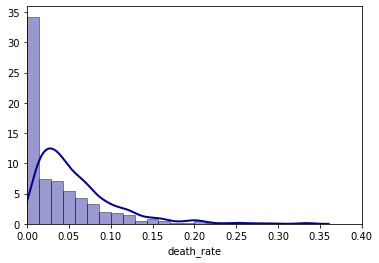

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Density Plot and Histogram of all arrival delays
plt.xlim(0, 0.4)
sns.distplot(healthweather_last_df['death_rate'], hist=True, kde=True, 
             bins=70, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'clip': (0.0, 0.4)})

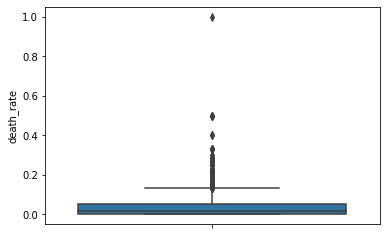

In [124]:
# Plot the box plot
ax = sns.boxplot(y='death_rate', data=healthweather_last_df)

In [146]:
# Define a threshold for number of cases in county to include county in the model. The more the cases, the more statistically meaningful data
healthweather_last_df[healthweather_last_df['cases']>50]['fips'].nunique()

1367

In [147]:
healthweather_last_filtered = healthweather_last_df[healthweather_last_df['cases']>50]

In [148]:
healthweather_last_filtered['death_rate'].describe()

count    1367.000000
mean        0.045162
std         0.039814
min         0.000000
25%         0.015385
50%         0.035573
75%         0.066381
max         0.274510
Name: death_rate, dtype: float64

In [156]:
# Set the median as threshold
death_rate_median = healthweather_last_filtered['death_rate'].quantile(0.5)
death_rate_median

0.03557312252964427

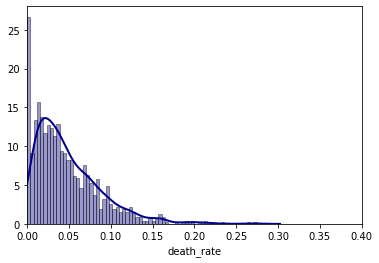

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
# Density Plot and Histogram of all arrival delays
plt.xlim(0, 0.4)
sns.distplot(healthweather_last_filtered['death_rate'], hist=True, kde=True, 
             bins=70, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'clip': (0.0, 0.4)})

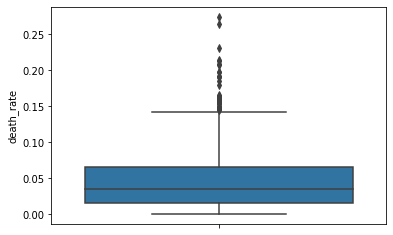

In [151]:
ax = sns.boxplot(y='death_rate', data=healthweather_last_filtered)

In [157]:
# Define the target column
healthweather_last_filtered['death_risk'] = healthweather_last_filtered['death_rate'].apply(lambda x: 0 if x<death_rate_median else 1)
healthweather_last_filtered

C:\Users\spo.DT\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,teen_birth_rate,num_uninsured,percent_uninsured,num_primary_care_physicians,primary_care_physicians_rate,num_dentists,dentist_rate,num_mental_health_providers,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,percent_vaccinated,high_school_graduation_rate,num_some_college,population,percent_some_college,num_unemployed_CHR,labor_force,percent_unemployed_CHR,percent_children_in_poverty,eightieth_percentile_income,twentieth_percentile_income,income_ratio,num_single_parent_households_CHR,num_households_CHR,percent_single_parent_households_CHR,num_associations,social_association_rate,annual_average_violent_crimes,violent_crime_rate,num_injury_deaths,injury_death_rate,average_daily_pm2_5,presence_of_water_violation,percent_severe_housing_problems,severe_housing_cost_burden,overcrowding,inadequate_facilities,percent_drive_alone_to_work,num_workers_who_drive_alone,percent_long_commute_drives_alone,life_expectancy,num_deaths_2,age_adjusted_death_rate,num_deaths_3,child_mortality_rate,num_deaths_4,infant_mortality_rate,percent_frequent_physical_distress,percent_frequent_mental_distress,percent_adults_with_diabetes,num_hiv_cases,hiv_prevalence_rate,num_food_insecure,percent_food_insecure,num_limited_access,percent_limited_access_to_healthy_foods,num_drug_overdose_deaths,drug_overdose_mortality_rate,num_motor_vehicle_deaths,motor_vehicle_mortality_rate,percent_insufficient_sleep,num_uninsured_2,percent_uninsured_2,num_uninsured_3,percent_uninsured_3,other_primary_care_provider_rate,percent_disconnected_youth,average_grade_performance,average_grade_performance_2,...,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,percent_female,num_rural,percent_rural,num_housing_units,num_households_CDC,num_below_poverty,num_unemployed_CDC,per_capita_income,num_no_highschool_diploma,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_single_parent_households_CDC,num_minorities,num_limited_english_abilities,num_multi_unit_housing,num_mobile_homes,num_overcrowding,num_households_with_no_vehicle,num_institutionalized_in_group_quarters,percent_below_poverty,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,percent_minorities,percent_limited_english_abilities,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability,km_to_closest_station,CALL,ELEV_M,station_id,station_name,mean_temp,min_temp,max_temp,dewpoint,sea_level_pressure,station_pressure,visibility,wind_s

In [210]:
# Find the categorical columns in sochealth_df and remove them all for now!!! inclusing the target column
healthweather_cat = healthweather_last_filtered.dtypes[healthweather_last_filtered.dtypes == 'object'].index.tolist()
healthweather_cat.append('death_risk')
healthweather_cat.append('death_rate')
healthweather_cat.append('deaths')
healthweather_cat.append('cases')
healthweather_cat.append('lon')
healthweather_cat.append('lat')

healthweather_cat

['date',
 'county',
 'state',
 'fips',
 'stay_at_home_announced',
 'stay_at_home_effective',
 'presence_of_water_violation',
 'CALL',
 'station_name',
 'precip_flag',
 'date_stay_at_home_announced',
 'date_stay_at_home_effective',
 'death_risk',
 'death_rate',
 'deaths',
 'cases',
 'lon',
 'lat']

In [211]:
# Remove the target column from dataset
y = healthweather_last_filtered.death_risk
X = healthweather_last_filtered.drop(healthweather_cat, 1)

In [212]:
# Fill missing values (if any) --- in this case I fill them with 0 for now--- but in reality we'll fill them with the state mean or common value
X.fillna('0', inplace=True)

In [213]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [214]:
# Splitting data into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [215]:
# Create a Standard Scaler instance
scaler = StandardScaler()

# Fit the Standard Scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [216]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=30, random_state=78)

In [217]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [218]:
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f'Random forest predictive accuracy: {accuracy_score(y_test, y_pred):.3f}')

Random forest predictive accuracy: 0.617


In [225]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.013099386981122552, 'drug_overdose_mortality_rate'),
 (0.011553952934516833, 'percent_hispanic'),
 (0.01140562662370002, 'percent_unemployed_CHR'),
 (0.011293777476271628, 'percentile_rank_limited_english_abilities'),
 (0.011082349893733764, 'percent_american_indian_alaska_native'),
 (0.01083032091124593, 'percent_age_65_and_older'),
 (0.010817508409202226, 'segregation_index_2'),
 (0.010642590968340302, 'percent_uninsured'),
 (0.010345244802360877, 'percent_uninsured_3'),
 (0.010200690591993262, 'percentile_rank_age_17_and_younger'),
 (0.010138918285107016, 'num_disabled'),
 (0.009911200368441167, 'percent_native_hawaiian_other_pacific_islander'),
 (0.009715895396896225, 'num_drug_overdose_deaths'),
 (0.0096815418817573, 'population_density_per_sqmi'),
 (0.009659493675414329, 'percent_homeowners'),
 (0.009594352384800066, 'percent_severe_housing_cost_burden'),
 (0.00936767212539966, 'percent_limited_english_abilities'),
 (0.00928757793063299, 'chlamydia_rate'),
 (0.009266547309206

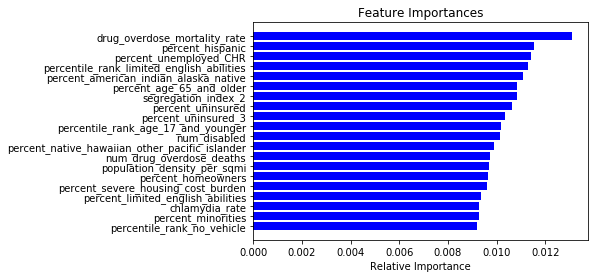

In [234]:
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
indices = indices[-20:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [228]:
indices

array([210, 189, 188, 187, 186, 185, 184, 190, 183, 181, 180, 179, 178,
       177, 209, 182, 192, 191, 194, 208, 207, 206, 205, 204, 203, 193,
       201, 202, 199, 198, 197, 196, 195, 200, 125,  33,  43,  72, 147,
        11,   0,  81,  37,  58, 124,  66, 133,  65,  25, 104, 126,   3,
        21,  44, 131,  78, 159, 112,  49,  27,  18, 155, 100,  23, 129,
        32,   4,  31, 141, 136, 128,  45,   5, 154,  12, 146,   9,  15,
        48,  79,  52, 151, 169,  96,  51,  94,  34,  70, 158, 138,  60,
        63,  64, 102,  40,  93,  98, 139, 117,  36,  71, 168,  68, 162,
        86, 140, 111,  67, 142, 173,  24,   7, 174,  30,  41, 134,  47,
        26, 123,  74, 109,  87, 108, 157,  54, 164,  28,  56, 106, 167,
        53,  91, 172,   6,  83,  97, 107,  88,  35, 150, 165,  80, 115,
        16, 145,  85, 163,  89,  10, 135,  57, 113,  17,  99,  20,  39,
       152, 153,  55, 119,  95,  14, 160,  69, 175,  42, 156,  73,  46,
        62,  90, 118,  59, 170, 105, 127, 122,  82,  50, 143,  1